# Regresion logica multinomial

In [202]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#for chapter 3.2
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

#for chapter 4
import statsmodels.api as sm

from sklearn.datasets import fetch_california_housing
from sklearn import datasets


In [203]:
iris= sns.load_dataset("iris")
iris.sample(5, random_state = 0)

,sepal_length,sepal_width,petal_length,petal_width,species
114,5.8,2.8,5.1,2.4,virginica
62,6.0,2.2,4.0,1.0,versicolor
33,5.5,4.2,1.4,0.2,setosa
107,7.3,2.9,6.3,1.8,virginica
7,5.0,3.4,1.5,0.2,setosa


In [204]:
# Cargar el conjunto de datos Iris
iris = datasets.load_iris()
data = iris.data  # Obtener los datos
feature_names = iris.feature_names  # Obtener los nombres de las características
target = iris.target  # Obtener las etiquetas de especies

# Crear un DataFrame de pandas con los datos de Iris, los nombres de las características y la columna de especies
iris = pd.DataFrame(data=data, columns=feature_names)
iris['species'] = target  # Agregar la columna de especies al DataFrame

# Mostrar las primeras filas del DataFrame
print(iris.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [205]:
X = iris.drop(['species'], axis=1)
y = iris['species']

In [206]:
from sklearn.model_selection import train_test_split

#Semilla aleatoria debido que es un modelo de aprendizaje porlo tanto cada que ejecute el mismo codigo, obtendra la misma división de datos cada vez. 

SEED = 42
# Esta línea realiza la división real del conjunto de datos en conjuntos de entrenamiento y prueba. 
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.25, random_state=SEED)

In [207]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='newton-cg', multi_class='multinomial')
log_reg.fit(trainX, trainY)
y_pred = log_reg.predict(testX)

In [208]:
print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))
print('Error rate: {:.2f}'.format(1 - accuracy_score(testY, y_pred)))

Accuracy: 1.00
Error rate: 0.00


In [209]:
clf = LogisticRegression(solver='newton-cg', multi_class='multinomial')
scores = cross_val_score(clf, trainX, trainY, cv=5)
scores

array([1.        , 1.        , 0.86363636, 1.        , 0.95454545])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



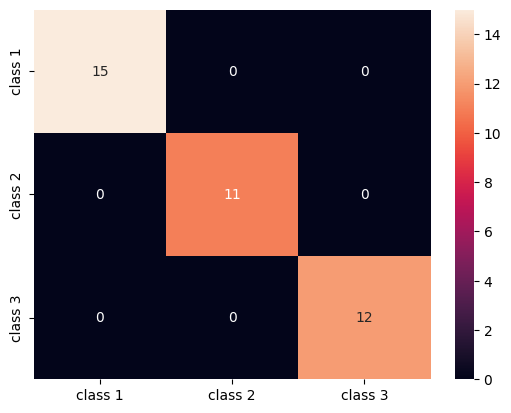

In [210]:
from sklearn.metrics import classification_report, confusion_matrix
#importing Seaborn's to use the heatmap 
import seaborn as sns

# Añadir nombres de clases para una mejor nterpretación
classes_names = ['class 1','class 2','class 3']

#Crear matriz de confusión
cm = pd.DataFrame(confusion_matrix(testY, y_pred), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
#Se utiliza Seaborn para crear un mapa de calor (heatmap) que visualiza la matriz de confusión
sns.heatmap(cm, annot=True, fmt='d');

# El informe de clasificación proporciona una serie de métricas, incluyendo la precisión, el recall, la puntuación F1 
print(classification_report(testY, y_pred))

In [211]:
probability = log_reg.predict_proba(testX)
probability

array([[3.98128027e-03, 8.22150003e-01, 1.73868716e-01],
       [9.44165224e-01, 5.58344661e-02, 3.09895682e-07],
       [1.20732365e-08, 1.82798756e-03, 9.98172000e-01],
       [6.67742550e-03, 7.87135087e-01, 2.06187488e-01],
       [1.54111253e-03, 7.69785250e-01, 2.28673638e-01],
       [9.52635948e-01, 4.73637898e-02, 2.62029613e-07],
       [7.75275970e-02, 9.06999481e-01, 1.54729224e-02],
       [1.77907381e-04, 1.58487419e-01, 8.41334673e-01],
       [2.32969943e-03, 7.75462482e-01, 2.22207819e-01],
       [2.87044401e-02, 9.44157018e-01, 2.71385418e-02],
       [4.69925226e-04, 2.40857451e-01, 7.58672624e-01],
       [9.65410413e-01, 3.45894735e-02, 1.13202578e-07],
       [9.70926615e-01, 2.90733331e-02, 5.17646981e-08],
       [9.58962905e-01, 4.10369331e-02, 1.61582771e-07],
       [9.77781831e-01, 2.22180665e-02, 1.02332752e-07],
       [4.72651978e-03, 6.96428005e-01, 2.98845476e-01],
       [8.51557538e-06, 2.58093147e-02, 9.74182170e-01],
       [2.75674593e-02, 9.46872

In [212]:
target_names = ["Setosa", 'Versicolor' ,'Virginical']
print(classification_report(testY, y_pred,target_names=target_names))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        15
  Versicolor       1.00      1.00      1.00        11
  Virginical       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



## Referencia

Multinomial Logistic Regression - Michael Fuchs Python. (2019, 15 noviembre). https://michael-fuchs-python.netlify.app/2019/11/15/multinomial-logistic-regression/